# Sentiment Analysis of Market Mood Index

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)
data.columns = [col.strip() for col in data.columns]

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data.head()

,Date,Market Mood Index,Nifty Index
0,2024-06-07,51.525161,23290.15
1,2024-06-06,43.454809,22821.40
2,2024-06-05,35.283719,22620.35
3,2024-06-04,48.996059,21884.50
4,2024-06-03,59.844635,23263.90


## Sentiment Analysis using TextBlob

In [10]:
data['Text'] = ['Market is bullish today with a lot of positive sentiment' if i % 3 == 0 else
                'Market is bearish with a lot of negative sentiment' if i % 3 == 1 else
                'Mixed feelings about the market today' for i in range(len(data))]

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data['Sentiment'] = data['Text'].apply(get_sentiment)

data.head()

,Date,Market Mood Index,Nifty Index,Text,Sentiment
0,2024-06-07,51.525161,23290.15,Market is bullish today with a lot of positive...,0.227273
1,2024-06-06,43.454809,22821.40,Market is bearish with a lot of negative senti...,-0.300000
2,2024-06-05,35.283719,22620.35,Mixed feelings about the market today,0.000000
3,2024-06-04,48.996059,21884.50,Market is bullish today with a lot of positive...,0.227273
4,2024-06-03,59.844635,23263.90,Market is bearish with a lot of negative senti...,-0.300000


## Visualization of Sentiment Analysis

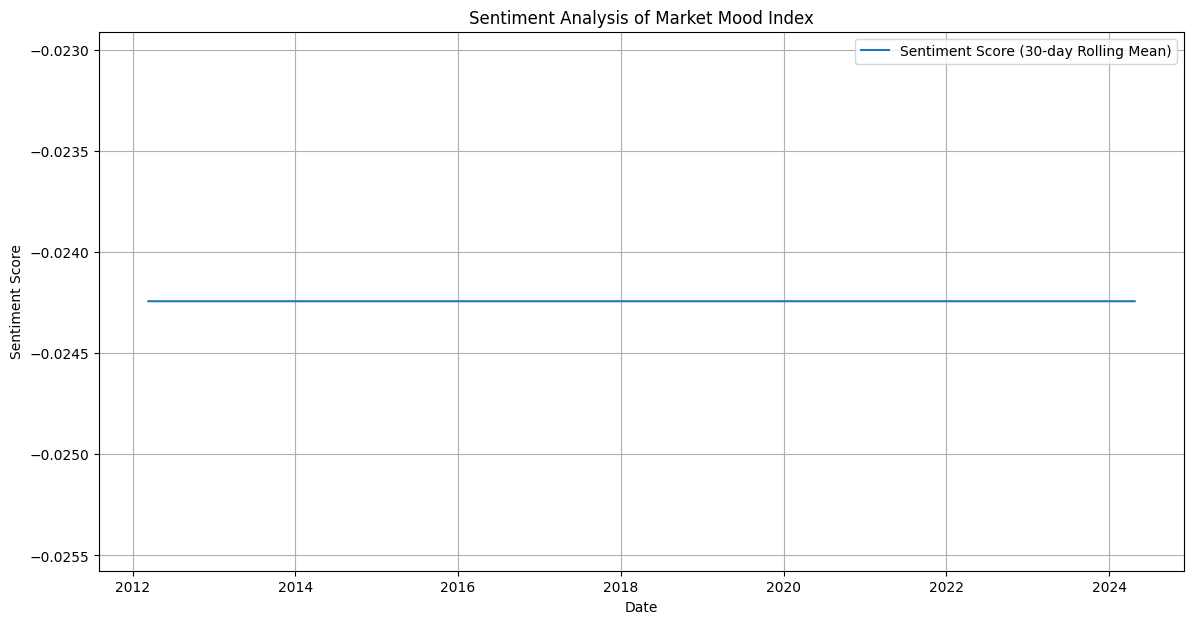

In [11]:
data['Sentiment_Rolling_Mean'] = data['Sentiment'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Sentiment_Rolling_Mean'], label='Sentiment Score (30-day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Market Mood Index')
plt.legend()
plt.grid(True)
plt.show()